In [1]:
from astropy.table import Table, join
from matplotlib import pyplot as plt

path_pattern = './snana_results/sdss_salt2_{}_n{}_{}.FITRES.TEXT'


In [2]:
def get_snana_results(path, prob_cut=0):
    
    data_table = Table.read(path, format='ascii', header_start=1, data_start=2)
    data_table = data_table[data_table['FITPROB'] > prob_cut]
    data_table = data_table[data_table['x1'] < max(data_table['x1'])]
    data_table = data_table[data_table['x1'] > min(data_table['x1'])]
    data_table = data_table[data_table['c'] < max(data_table['c'])]
    data_table = data_table[data_table['x1'] > min(data_table['x1'])]
    
    return data_table


In [3]:
def show_save(*args, show=False, **kwargs):
    """Can either show or save a matplotlib figure
    
    Saves figure if show is false, otherwise calls plt.show() without saving.
    
    Args:
        Accepts the same arguments as matplotlib.pyplot.savefig
        show (bool): Calls plt.show()
    """

    if show:
        plt.show()
    
    else:
        plt.savefig(*args, **kwargs)
        plt.clf()
        

In [4]:
def plot_color_v_stretch_obs(*args, show=False, **kwargs):
    
    plt.clf()
    
    fig = plt.figure(figsize=(15, 5))
    ax_ug = fig.add_subplot(1, 3, 1)
    ax_ri = fig.add_subplot(1, 3, 2)
    ax_ugriz = fig.add_subplot(1, 3, 3)
    
    ax_ug.set_ylabel('Color (c)')
    ax_ri.set_xlabel('Stretch (x1)')
    
    prob_cut = .9
    sdss_salt2_ug_obs = get_snana_results(path_pattern.format('ug', 1, 'obs'), prob_cut)
    ax_ug.scatter(sdss_salt2_ug_obs['x1'], sdss_salt2_ug_obs['c'], s=2)
    ax_ug.errorbar(sdss_salt2_ug_obs['x1'], sdss_salt2_ug_obs['c'],
                   sdss_salt2_ug_obs['x1ERR'], sdss_salt2_ug_obs['cERR'],
                   alpha=.1, fmt='.')

    sdss_salt2_ri_obs = get_snana_results(path_pattern.format('ri', 1, 'obs'), prob_cut)
    ax_ri.scatter(sdss_salt2_ri_obs['x1'], sdss_salt2_ri_obs['c'], s=2)
    ax_ri.errorbar(sdss_salt2_ri_obs['x1'], sdss_salt2_ri_obs['c'],
                   sdss_salt2_ri_obs['x1ERR'], sdss_salt2_ri_obs['cERR'],
                   alpha=.1, fmt='.')

    sdss_salt2_ugriz_obs = get_snana_results(path_pattern.format('ug', 1, 'obs'), prob_cut)
    ax_ugriz.scatter(sdss_salt2_ugriz_obs['x1'], sdss_salt2_ugriz_obs['c'], s=2)
    ax_ugriz.errorbar(sdss_salt2_ugriz_obs['x1'], sdss_salt2_ugriz_obs['c'],
                      sdss_salt2_ugriz_obs['x1ERR'], sdss_salt2_ugriz_obs['cERR'],
                      alpha=.1, fmt='.')
    
    show_save(show=show, **kwargs)
    

Color vs Stretch for SNe Ia with Data Cuts using observed ug, ri, and ugriz


<Figure size 432x288 with 0 Axes>

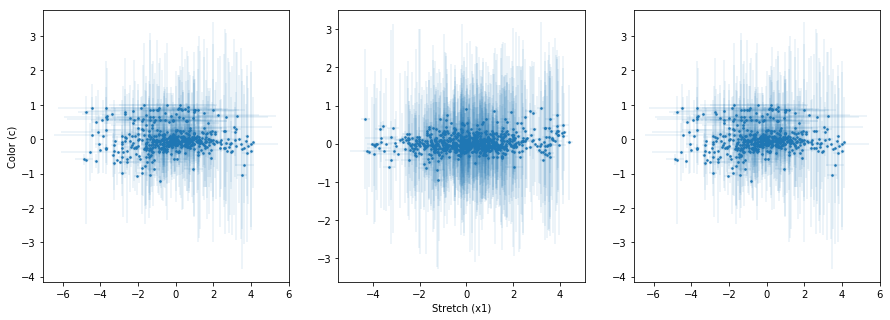

In [5]:
print('Color vs Stretch for SNe Ia with Data Cuts using observed ug, ri, and ugriz')
plot_color_v_stretch_obs(show=True)


In [6]:
def plot_color_v_stretch_res(*args, show=False, **kwargs):
    
    plt.clf()
    
    fig = plt.figure(figsize=(15, 5))
    ax_ug = fig.add_subplot(1, 3, 1)
    ax_ri = fig.add_subplot(1, 3, 2)
    ax_ugriz = fig.add_subplot(1, 3, 3)
    
    ax_ug.set_ylabel('Color (c)')
    ax_ri.set_xlabel('Stretch (x1)')
    
    prob_cut = .9
    sdss_salt2_ug_res = get_snana_results(path_pattern.format('ug', 1, 'res'), prob_cut)
    ax_ug.scatter(sdss_salt2_ug_res['x1'], sdss_salt2_ug_res['c'], s=2)
    ax_ug.errorbar(sdss_salt2_ug_res['x1'], sdss_salt2_ug_res['c'],
                   sdss_salt2_ug_res['x1ERR'], sdss_salt2_ug_res['cERR'],
                   alpha=.1, fmt='.')

    sdss_salt2_ri_res = get_snana_results(path_pattern.format('ri', 1, 'res'), prob_cut)
    ax_ri.scatter(sdss_salt2_ri_res['x1'], sdss_salt2_ri_res['c'], s=2)
    ax_ri.errorbar(sdss_salt2_ri_res['x1'], sdss_salt2_ri_res['c'],
                   sdss_salt2_ri_res['x1ERR'], sdss_salt2_ri_res['cERR'],
                   alpha=.1, fmt='.')
    
    show_save(show=show, **kwargs)
    

<Figure size 432x288 with 0 Axes>

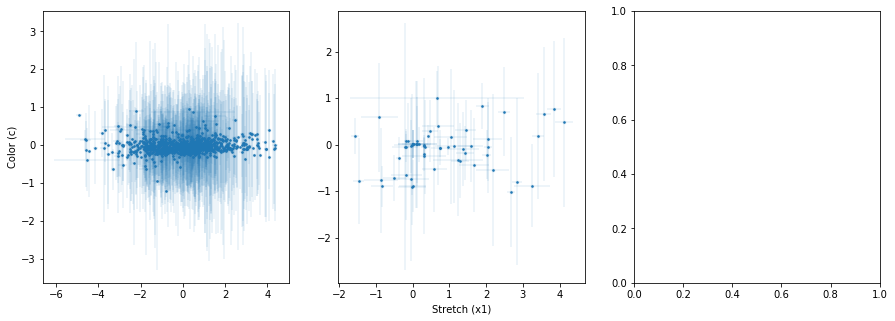

In [7]:
plot_color_v_stretch_res(show=True)


In [8]:
def plot_ia_chi2(*args, show=False, **kwargs):
    
    prob_cut = .9
    sdss_salt2_ug_obs = get_snana_results(path_pattern.format('ug', 1, 'res'), prob_cut)
    sdss_salt2_ug_obs.keep_columns(['VARNAMES:', 'CID', 'FITCHI2'])
    sdss_salt2_ug_obs.rename_column('FITCHI2', 'ug_CHI2')
        
    sdss_salt2_ri_obs = get_snana_results(path_pattern.format('ri', 1, 'res'), prob_cut)
    sdss_salt2_ri_obs.keep_columns(['VARNAMES:', 'CID', 'FITCHI2'])
    sdss_salt2_ri_obs.rename_column('FITCHI2', 'ri_CHI2')
    
    combined_table = join(sdss_salt2_ug_obs, sdss_salt2_ri_obs, keys=['VARNAMES:', 'CID'])
   
    fig = plt.figure(figsize=(5, 5))
    ax_1 = fig.add_subplot(1, 1, 1)
    
    ax_1.set_xlim(0, 100)
    ax_1.set_ylim(0, 100)
    ax_1.set_xlabel(r'ug $\chi ^2$')
    ax_1.set_ylabel(r'ri $\chi ^2$')
    
    
    ax_1.scatter(combined_table['ug_CHI2'], combined_table['ri_CHI2'], s=8)
    show_save(show=show)
    


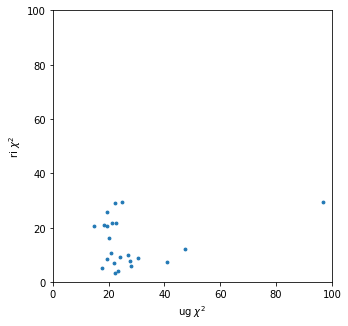

In [9]:
plot_ia_chi2(show=True)